importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates

import seaborn as sns

Downloading dataset from web using yfinance

In [3]:
data = yf.download('KO',start='2015-01-01',end='2025-01-01')
data.reset_index(inplace=True)
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_30652\575467633.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('KO',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.222620,30.409092,29.978773,30.308683,9921100
1,2015-01-05,30.222620,30.817894,30.179590,30.617077,26292600
2,2015-01-06,30.452133,30.796387,30.294352,30.416274,16897500
3,2015-01-07,30.832228,30.918290,30.538178,30.695959,13412300
4,2015-01-08,31.205175,31.248208,30.911125,30.968502,21743600


Basic Information

In [4]:
print("Basic INformation\n\n",data.info())
print()
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2516 non-null   datetime64[ns]
 1   (Close, KO)   2516 non-null   float64       
 2   (High, KO)    2516 non-null   float64       
 3   (Low, KO)     2516 non-null   float64       
 4   (Open, KO)    2516 non-null   float64       
 5   (Volume, KO)  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
Basic INformation

 None

First Data

 Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.222620  30.409092  29.978773  30.308683   9921100
1      2015-01-05  30.222620  30.817894  30.179590  30.617077  26292600
2      2015-01-06  30.452133  30.796387  30.294352  30.416274  16897500
3      2015-01-07  30.83

Checking for missing values

In [5]:
data.isnull().sum()

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64

Feature Addition

In [6]:
data['Differcence per day'] = data['High'] - data['Low']
data.columns = data.columns.get_level_values(0)
# data['Differcence per day'].head()
data['Upper wick'] = data['High'] - data[['Open', 'Close']].max(axis=1)
data['Lower wick'] = data[['Open', 'Close']].min(axis=1) - data['Low']
data['Avg Growth'] = ((data['Low']+data['High']+data["Close"]+data['Open'])/4)*data['Volume']
print(data.columns.tolist())



['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Differcence per day', 'Upper wick', 'Lower wick', 'Avg Growth']


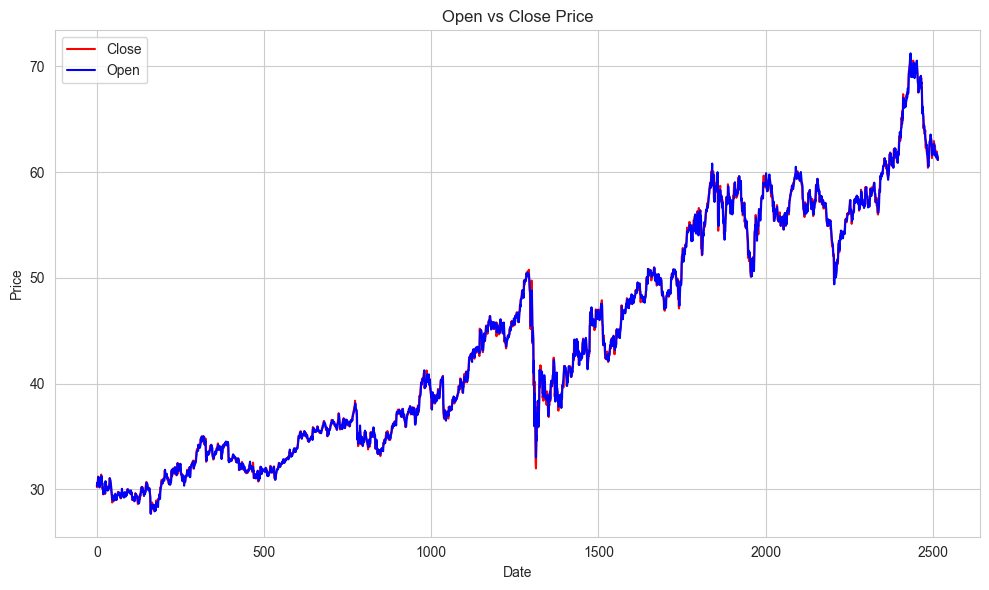

In [7]:

sns.set_style('whitegrid')  # Optional: better visuals
plt.figure(figsize=(10, 6))  # Larger size

sns.lineplot(data=data['Close'], color='red',label='Close')
sns.lineplot(data=data['Open'], color='blue', label='Open')

plt.legend()
plt.title('Open vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()

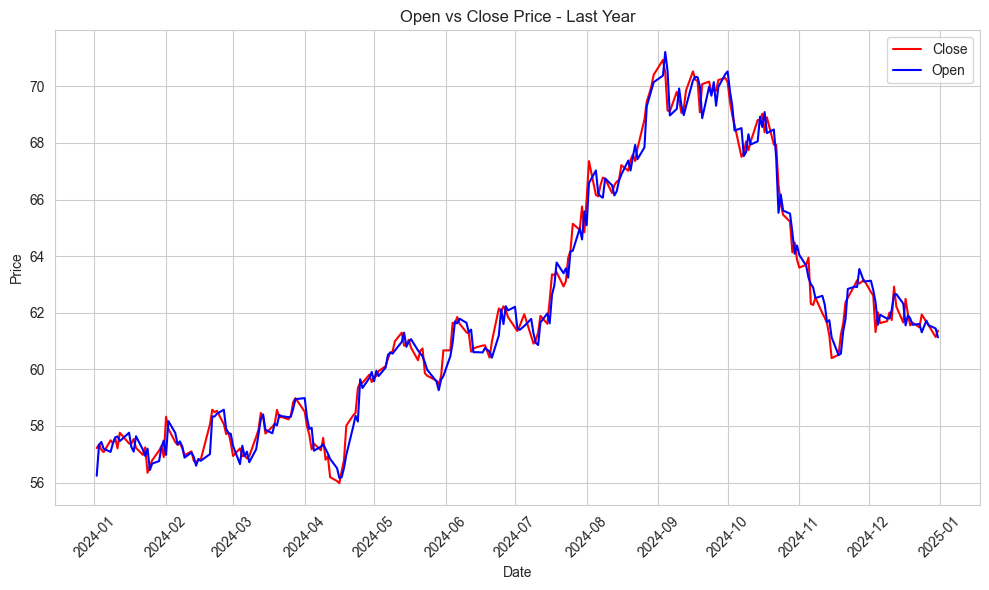

In [8]:
# Filter last year
lastyear = data.loc[data['Date'] >= data['Date'].max() - pd.DateOffset(years=1)]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=lastyear, color='red', label='Close')
sns.lineplot(x='Date', y='Open', data=lastyear, color='blue', label='Open')

# Date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=1))  # one tick per month
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m'))  # format: 2025-07
plt.xticks(rotation=45)

# Labels
plt.title('Open vs Close Price - Last Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2020-03-16'),
  Text(1, 0, '2022-05-18'),
  Text(2, 0, '2020-03-20'),
  Text(3, 0, '2020-03-19'),
  Text(4, 0, '2020-03-18'),
  Text(5, 0, '2020-03-25'),
  Text(6, 0, '2020-03-12'),
  Text(7, 0, '2022-03-08'),
  Text(8, 0, '2023-10-05'),
  Text(9, 0, '2020-02-27')])

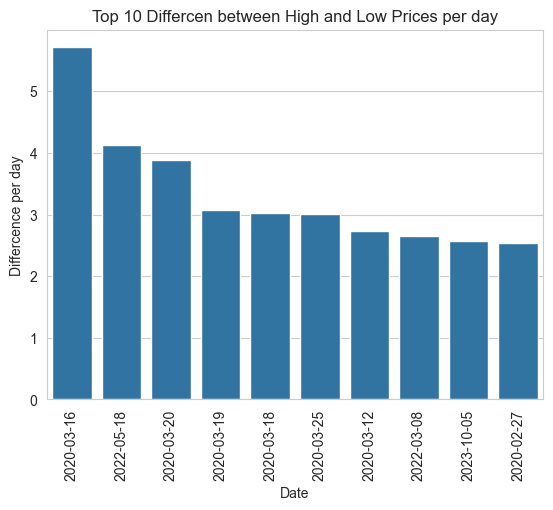

In [9]:
top10 = data.sort_values(by='Differcence per day',ascending=False).head(10)
sns.set_style('whitegrid')
plt.Figure(figsize=(5,5))
plt.title("Top 10 Differcen between High and Low Prices per day")

sns.barplot(data=top10,x=top10['Date'], y = top10['Differcence per day'])
plt.xticks(rotation=90)

(array([2019.5, 2020. , 2020.5, 2021. , 2021.5, 2022. , 2022.5, 2023. ,
        2023.5, 2024. , 2024.5]),
 [Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5'),
  Text(2021.0, 0, '2021.0'),
  Text(2021.5, 0, '2021.5'),
  Text(2022.0, 0, '2022.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2023.0, 0, '2023.0'),
  Text(2023.5, 0, '2023.5'),
  Text(2024.0, 0, '2024.0'),
  Text(2024.5, 0, '2024.5')])

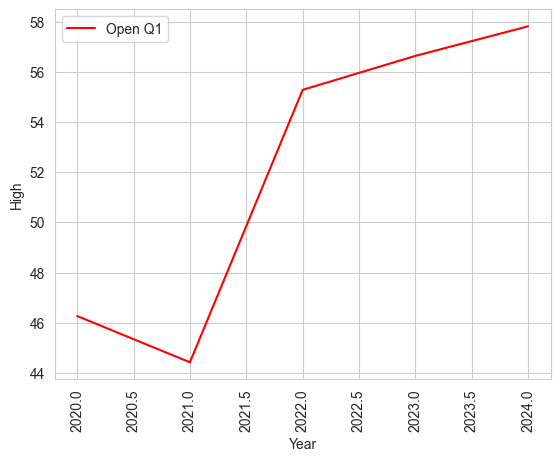

In [10]:
Q1 = data[(data['Date'].dt.month.isin([1,2,3])) & (data['Date'].between('2020-01-01','2025-01-01'))]
Q1 = Q1.groupby(Q1['Date'].dt.year)['High'].mean().reset_index()
Q1.columns = ['Year', 'High'] 

Q2 = data[data['Date'].dt.month.isin([4,5,6])]
Q3 = data[data['Date'].dt.month.isin([7,8,9])]
Q4 = data[data['Date'].dt.month.isin([10,11,12])]

plt.Figure(figsize=(8,5))
sns.lineplot(x='Year',y='High',data=Q1,color='red',label='Open Q1')
ax = plt.gca()
# ax.xaxis.set_major_locator(pltdates.MonthLocator(bymonth=[1, 2, 3], interval=1))  # Only Jan, Feb, Mar
# ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m'))  # Format: YYYY-MM
plt.xticks(rotation=90)

(array([18201., 18231., 18262., 18293., 18322., 18353., 18383., 18414.,
        18444., 18475., 18506., 18536., 18567., 18597., 18628., 18659.,
        18687., 18718., 18748., 18779., 18809., 18840., 18871., 18901.,
        18932., 18962., 18993., 19024., 19052., 19083., 19113., 19144.,
        19174., 19205., 19236., 19266., 19297., 19327., 19358., 19389.,
        19417., 19448., 19478., 19509., 19539., 19570., 19601., 19631.,
        19662., 19692., 19723., 19754., 19783., 19814., 19844., 19875.,
        19905., 19936., 19967., 19997., 20028., 20058., 20089., 20120.,
        20148., 20179.]),
 [Text(18201.0, 0, '2019'),
  Text(18231.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18293.0, 0, '2020'),
  Text(18322.0, 0, '2020'),
  Text(18353.0, 0, '2020'),
  Text(18383.0, 0, '2020'),
  Text(18414.0, 0, '2020'),
  Text(18444.0, 0, '2020'),
  Text(18475.0, 0, '2020'),
  Text(18506.0, 0, '2020'),
  Text(18536.0, 0, '2020'),
  Text(18567.0, 0, '2020'),
  Text(18597.0, 0, '2020'),
  Text

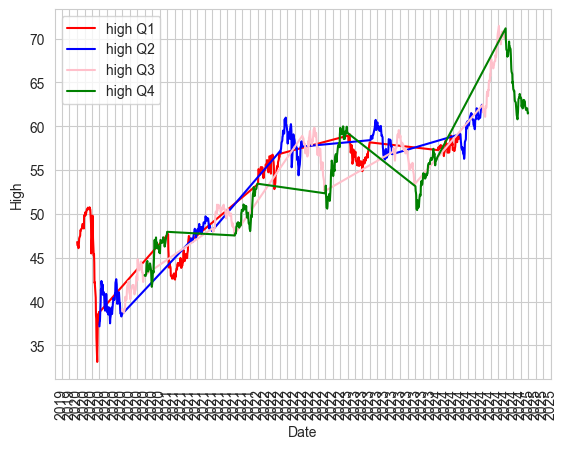

In [ ]:
Q1 = data[(data['Date'].dt.month.isin([1,2,3])) & (data['Date'].between('2020-01-01','2025-01-01'))]


Q2 = data[(data['Date'].dt.month.isin([4,5,6])) & (data['Date'].between('2020-01-01','2025-01-01'))]
Q3 = data[(data['Date'].dt.month.isin([7,8,9])) & (data['Date'].between('2020-01-01','2025-01-01'))]
Q4 = data[(data['Date'].dt.month.isin([10,11,12])) & (data['Date'].between('2020-01-01','2025-01-01'))]

plt.Figure(figsize=(8,5))
sns.lineplot(x='Date',y='High',data=Q1,color='red',label='high Q1')
sns.lineplot(x='Date',y='High',data=Q2,color='blue',label='high Q2')
sns.lineplot(x='Date',y='High',data=Q3,color='pink',label='high Q3')
sns.lineplot(x='Date',y='High',data=Q4,color='green',label='high Q4')
ax = plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(bymonth=[1, 2, 3], interval=1))  # Only Jan, Feb, Mar
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))  # Format: YYYY-MM
plt.xticks(rotation=90)
